In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import summarize

In [2]:
# Load controls_D2 data from csv

df_ctrl_d2_24 = pd.read_csv('df_ctrl_d2_24.csv', index_col=0)
df_ctrl_d2_48 = pd.read_csv('df_ctrl_d2_48.csv', index_col=0)
df_ctrl_d2_72 = pd.read_csv('df_ctrl_d2_72.csv', index_col=0)

## <div class="alert alert-block alert-info">Thoughts and Hypothesis Test</div>

### Question-1: According to my experience, the treated C and G data need to substract the controls before the analysis. Do I need to do the same process in this scenario?  
    No. 

### Question-2: How to deal with cp_type, cp_time, and cp_dose?
    Dummy varibales

In [3]:
# Quick view of the controls treated with D2 for 24 hours
df_ctrl_d2_24.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,
id_007bfbb91,ctl_vehicle,24,D2,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
id_009d8340f,ctl_vehicle,24,D2,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,...,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
id_010629f4f,ctl_vehicle,24,D2,1.7470,0.8486,-0.8951,-0.2527,0.8395,-1.8240,0.7343,...,0.1143,-1.4060,-1.0940,0.3996,-0.2615,1.4650,-1.2790,-0.0619,0.5689,0.0263
id_018492dbc,ctl_vehicle,24,D2,0.3005,-0.8478,-0.2077,-0.7008,-2.3650,2.5120,3.4770,...,-0.0912,-0.2713,-0.0003,0.8811,0.1678,1.5990,0.6527,1.1550,0.3270,-0.5111
id_01c65d875,ctl_vehicle,24,D2,0.2039,-0.5514,0.4358,0.9672,-2.6010,-1.2680,0.1969,...,0.3399,-0.8408,-1.9690,0.3267,-0.4286,0.9430,-0.1098,0.9718,0.1334,-1.2490


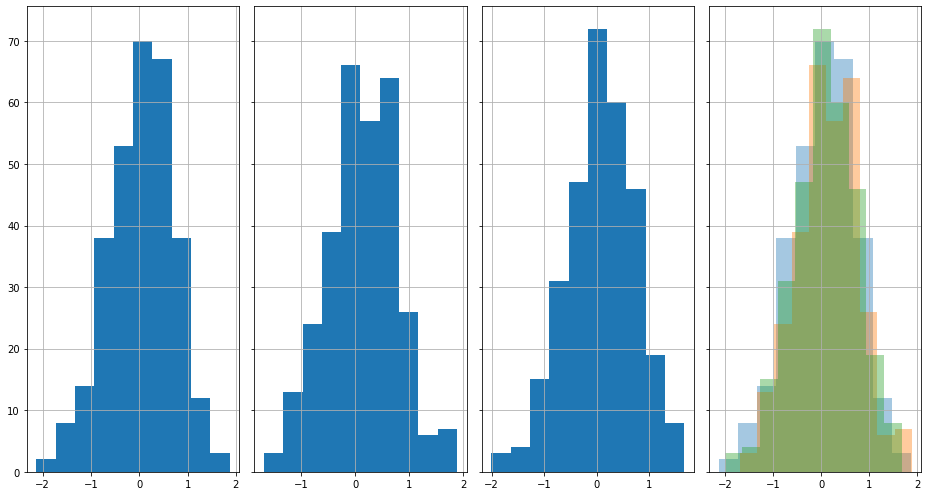

In [20]:
# Take cell line # 0 for example

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(13,7), sharey=True)
df_ctrl_d2_24.loc[:, 'c-0'].hist(ax=ax1)
df_ctrl_d2_48.loc[:, 'c-0'].hist(ax=ax2)
df_ctrl_d2_72.loc[:, 'c-0'].hist(ax=ax3)
df_ctrl_d2_24.loc[:, 'c-0'].hist(ax=ax4, alpha=0.4)
df_ctrl_d2_48.loc[:, 'c-0'].hist(ax=ax4, alpha=0.4)
df_ctrl_d2_72.loc[:, 'c-0'].hist(ax=ax4, alpha=0.4)

plt.tight_layout()

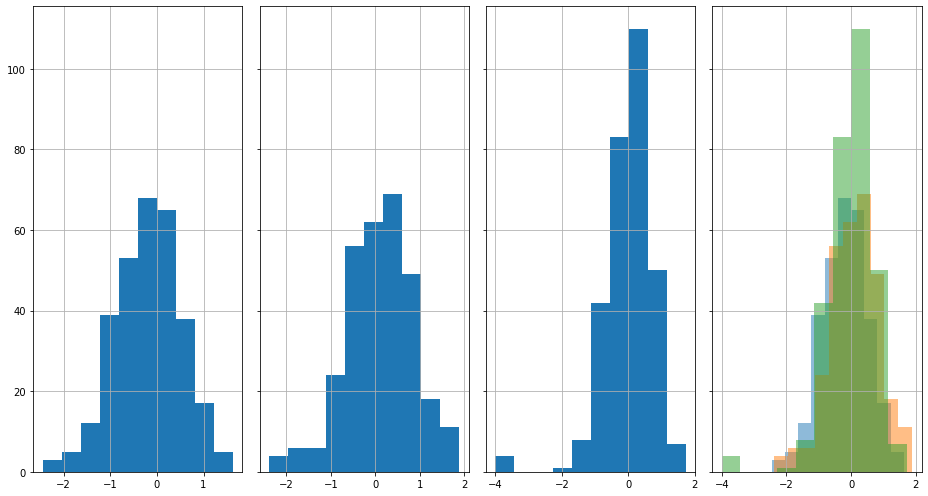

In [19]:
# Take cell line # 0 for example

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(13,7), sharey=True)
df_ctrl_d2_24.loc[:, 'c-42'].hist(ax=ax1)
df_ctrl_d2_48.loc[:, 'c-42'].hist(ax=ax2)
df_ctrl_d2_72.loc[:, 'c-42'].hist(ax=ax3)
df_ctrl_d2_24.loc[:, 'c-42'].hist(ax=ax4, alpha=0.5)
df_ctrl_d2_48.loc[:, 'c-42'].hist(ax=ax4, alpha=0.5)
df_ctrl_d2_72.loc[:, 'c-42'].hist(ax=ax4, alpha=0.5)

plt.tight_layout()

**Takeaways**: Under the same condition for the same cell lines, 

### Are gene expressions in controls with dose D2 different over the time? Take g-0 for example: Is the g-0 expression in control with dose 2 different at 24 vs. 48 hours?
$H_0$: The average g-0 expressions in control with dose 2 are the same at 24 vs. 48 hours.<br>
$H_a$: The average g-0 expressions in control with dose 2 are significantly different at 24 vs. 48 hours.

In [3]:
# Test the assumption of equal variance by Levene's test

stats.levene(df_ctrl_d2_24['g-0'], df_ctrl_d2_48['g-0'])

# since p > 0.05, we can say that the variances are not significantly different
# set the argument in ttest_ind of equal_var to be true

LeveneResult(statistic=3.0660366167455915, pvalue=0.0804484376816337)

In [5]:
df_ctrl_d2_24['g-0'].size, df_ctrl_d2_48['g-0'].size

(305, 305)

Text(0.5, 1.0, 'Compare g-0 expressions at 24 and 48 hrs')

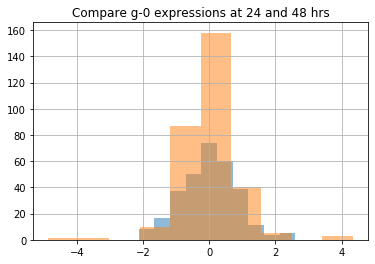

In [20]:
# Compare the histograms of the g-0 data at 24 vs. 48 hours. 

df_ctrl_d2_24['g-0'].hist(alpha=0.5)
df_ctrl_d2_48['g-0'].hist(alpha=0.5)
plt.title("Compare g-0 expressions at 24 and 48 hrs")

# The data between the 2 g-0s binned differently 

Text(0.5, 1.0, 'Compare g-0 expression at 24 and 48 hrs')

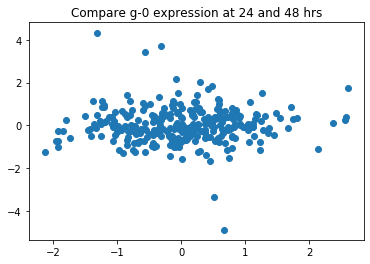

In [11]:
# Scatter plot the 2 g-0 data. 

plt.scatter(x=df_ctrl_d2_24['g-0'], y=df_ctrl_d2_48['g-0'])
plt.title("Compare g-0 expression at 24 and 48 hrs")

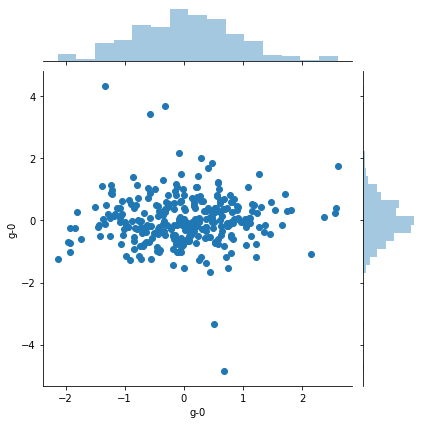

In [18]:
# Jointplot the 2 g-0 data

sns.jointplot(x=df_ctrl_d2_24['g-0'], y=df_ctrl_d2_48['g-0'])
# plt.title("Compare g-0 expression at 24 and 48 hrs")

In [16]:
# variances are equal
# t-test

stats.ttest_ind(df_ctrl_d2_24['g-0'], df_ctrl_d2_48['g-0'], equal_var=True)

# Since p > 0.05, it is fail to reject the H0.

Ttest_indResult(statistic=-0.03571110005597076, pvalue=0.9715244406896814)

### Expand to all gene expression in control with dose 2 different at 24 vs. 48 hours?
$H_0$: The average gene expressions in control with dose 2 are the same at 24 vs. 48 hours.<br>
$H_a$: The average gene expressions in control with dose 2 are significantly different at 24 vs. 48 hours.

In [22]:
# Iterate the rest of the gene expression data

output = {}

for i in range(0, 772):
    gene = 'g-' + str(i)
    s, p = stats.levene(df_ctrl_d2_24[gene], df_ctrl_d2_48[gene])
    if p < 0.05:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[gene], df_ctrl_d2_48[gene], equal_var=False)
    else:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[gene], df_ctrl_d2_48[gene], equal_var=True)
    output[gene] = p1

ctrl_24_48 = pd.Series(output)
ctrl_24_48.size

772

In [64]:
# Count how many genes are expressed differently for control group treated with does D2 
# at 24 hours vs. 48 hours
# set the alpha = 0.05

mask = (ctrl_24_48 < 0.05)
diff_g_24_48 = ctrl_24_48[mask]
diff_g_24_48.size

290

### Expand to all gene expression in control with dose 2 different at 48 vs. 72 hours?
$H_0$: The average gene expressions in control with dose 2 are the same at 48 vs. 72 hours.<br>
$H_a$: The average gene expressions in control with dose 2 are significantly different at 48 vs. 72 hours.

In [30]:
output = {}

for i in range(0, 772):
    gene = 'g-' + str(i)
    s, p = stats.levene(df_ctrl_d2_48[gene], df_ctrl_d2_72[gene])
    if p < 0.05:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_48[gene], df_ctrl_d2_72[gene], equal_var=False)
    else:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_48[gene], df_ctrl_d2_72[gene], equal_var=True)
    output[gene] = p1

ctrl_48_72 = pd.Series(output)
ctrl_48_72.size

772

In [63]:
# Count how many genes are expressed differently for control group treated with does D2 
# at 48 hours vs. 72 hours
# set the alpha = 0.05

mask = (ctrl_48_72 < 0.05)
diff_g_48_72 = ctrl_48_72[mask]
diff_g_48_72.size

261

In [56]:
diff_g_24_48.head()

g-1     2.135088e-03
g-2     2.410092e-09
g-4     4.173489e-03
g-5     1.330103e-02
g-10    8.116233e-03
dtype: float64

In [57]:
diff_g_48_72.head()

g-2     1.313885e-02
g-4     9.986158e-07
g-6     1.029790e-04
g-18    4.836402e-04
g-19    2.758921e-03
dtype: float64

In [65]:
# Convert the g-# that expressed differently to set

set_diff_g_24_48 = set(diff_g_24_48.index.tolist())
set_diff_g_48_72 = set(diff_g_48_72.index.tolist())

# Find out the intersection between the two sets

len(set_diff_g_24_48 & set_diff_g_48_72)

107

**Takeaways**<br>
- Do I need to address the outliers in gene expression data? In MVP, No.<br>
- The average g-0 expressions in control with dose 2 are the same for 24 vs. 48 hours.<br>
- In controls treated with dose 2 at 24 vs. 48 hours:<br> 
    - 290 genes expressed significantly different.<br>
        - caused by controls<br>
        - caused by outliers<br>
        - natural process, caused by cell proliferation<br>
- In controls treated with dose 2 at 48 vs. 72 hours:<br>
    - 261 genes expressed significantly different.<br>
    - Compare with previous 24 vs. 48, 107 genes are in common.

# Explore Cell Viability Data
## Visualize the entire cell viability data

In [4]:
# Read data frame with c-# columns only 

df_cv = pd.read_csv('df_cell_viability.csv', index_col=0)
df_cv.shape

(23814, 100)

In [5]:
df_cv.head()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
id_000779bfc,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
id_000a6266a,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
id_0015fd391,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
id_001626bd3,-0.3774,0.7364,-0.1659,0.2341,1.0060,0.3204,-0.0852,-0.2284,-0.2533,-0.3174,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [6]:
# Melt cell viability data into a single column

df_cv_1col = df_cv.melt(var_name='cell_line').set_index('cell_line')
df_cv_1col.shape

(2381400, 1)

In [12]:
# Print the descriptive statistics of the entire cell viability dataset

percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

df_cv_1col.describe(percentiles).round(3)

,value
count,2381400.000
mean,-0.432
std,1.905
min,-10.000
10%,-1.439
20%,-0.734
30%,-0.423
40%,-0.198
50%,-0.005
60%,0.175


[Text(0.5, 0, '')]

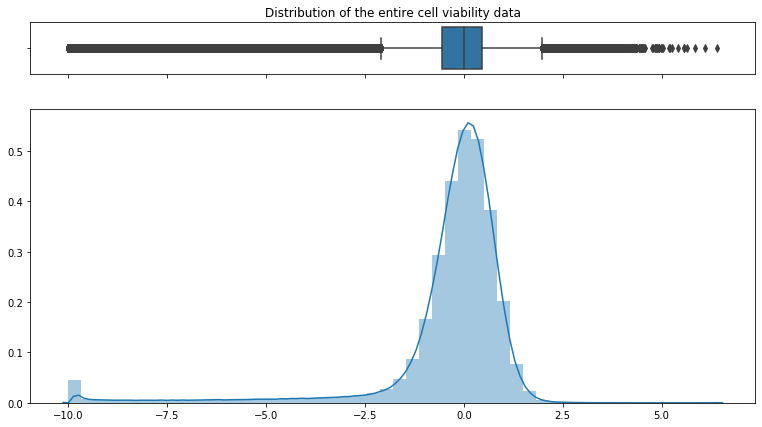

In [15]:
# Plot the entire cell viability data

# Cut the window into 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(13,7),  
                                      gridspec_kw={"height_ratios": (0.15, 0.85)})

# Add a graph in each part
sns.boxplot(df_cv_1col, ax=ax_box)
sns.distplot(df_cv_1col, kde=True, ax=ax_hist)


# Add title
ax_box.set_title('Distribution of the entire cell viability data')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Takeaways**
- The mean is -0.432 and the median -0.005, close to zero. 
- 80% of the data are between -1.439 and 0.839.
- A small bump was observed at -10. 

## Visualize the control cell viability data

In [16]:
# Read control dataset

df_ctrl = pd.read_csv('df_ctrl.csv', index_col=0)
df_ctrl.shape

(1866, 875)

In [17]:
# Extract cell viability data only 

mask_c = df_ctrl.columns.str.contains('c-')
df_ctrl_c = df_ctrl.iloc[:, mask_c]
df_ctrl_c.shape

(1866, 100)

In [18]:
# Melt control cell viability data into a single columna

df_ctrl_c_1col = df_ctrl_c.melt(var_name='cell_line').set_index('cell_line')
df_ctrl_c_1col.shape

(186600, 1)

In [19]:
# Print the descriptive statistics of the control cell viability dataset

percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

df_ctrl_c_1col.describe(percentiles).round(3)

,value
count,186600.000
mean,0.168
std,0.740
min,-10.000
10%,-0.705
20%,-0.369
30%,-0.142
40%,0.046
50%,0.218
60%,0.382


[Text(0.5, 0, '')]

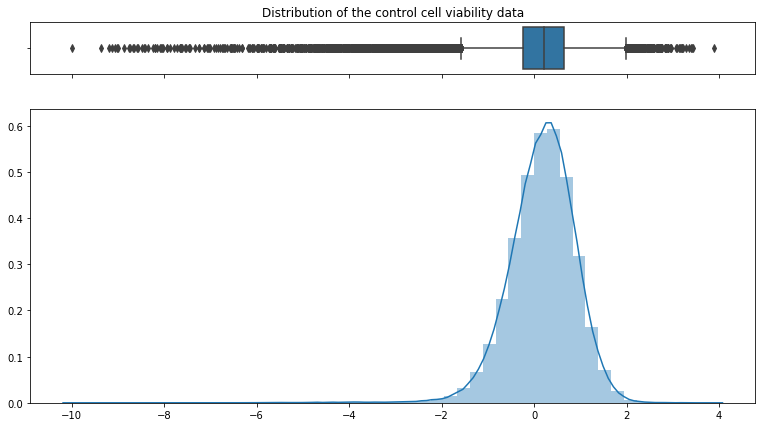

In [20]:
# Plot cell viability data as a whole

# Cut the window into 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(13,7),  
                                      gridspec_kw={"height_ratios": (0.15, 0.85)})

# Add a graph in each part
sns.boxplot(df_ctrl_c_1col, ax=ax_box)
sns.distplot(df_ctrl_c_1col, kde=True, ax=ax_hist)

# Add title
ax_box.set_title('Distribution of the control cell viability data')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Takeaways**
- The mean is 0.168 and the median is 0.218.
- 80% of the data are between -0.705 and 1.014.

## Visualize the trt cell viability data

In [22]:
# Read trt dataset

df_trt = pd.read_csv('df_trt.csv', index_col=0)
df_trt.shape

(21948, 875)

In [23]:
# Extract cell viability data only 

mask_c = df_trt.columns.str.contains('c-')
df_trt_c = df_trt.iloc[:, mask_c]
df_trt_c.shape

(21948, 100)

In [24]:
# Melt trt cell viability data into a single columna

df_trt_c_1col = df_trt_c.melt(var_name='cell_line').set_index('cell_line')
df_trt_c_1col.shape

(2194800, 1)

In [26]:
# Print the descriptive statistics of the trt cell viability dataset

percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

df_trt_c_1col.describe(percentiles).round(3)

,value
count,2194800.000
mean,-0.483
std,1.964
min,-10.000
10%,-1.552
20%,-0.770
30%,-0.449
40%,-0.220
50%,-0.026
60%,0.156


[Text(0.5, 0, '')]

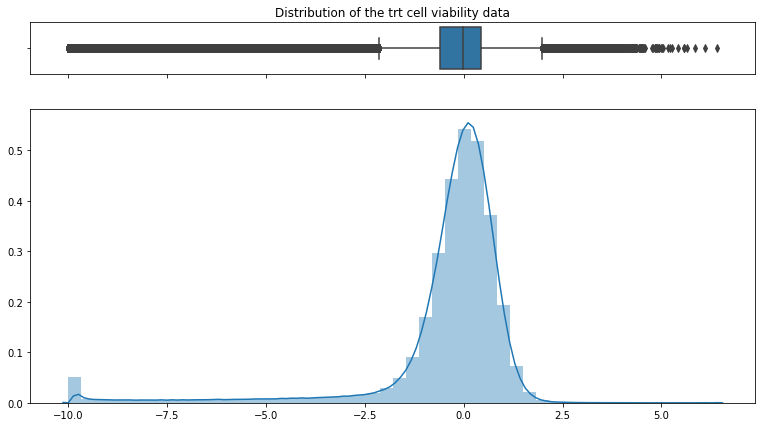

In [25]:
# Plot of the viability of c-0 in the controls treated with D2 for 24 hours

# Cut the window into 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(13,7),  
                                      gridspec_kw={"height_ratios": (0.15, 0.85)})

# Add a graph in each part
sns.boxplot(df_trt_c_1col, ax=ax_box)
sns.distplot(df_trt_c_1col, kde=True, ax=ax_hist)

# Add title
ax_box.set_title('Distribution of the trt cell viability data')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Takeaways**
- the mean is -0.483 and the median is -0.026.
- 80% of the data are between -1.552 and 0.821.

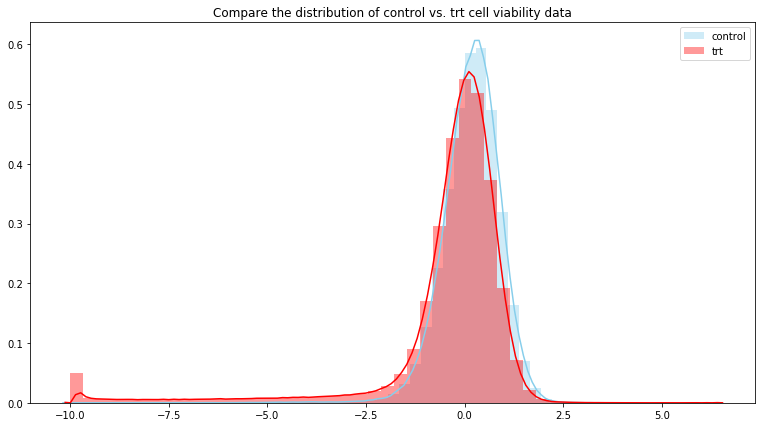

In [27]:
# Compare control vs. trt cell viability distribution

plt.figure(figsize=(13,7))
sns.distplot(df_ctrl_c_1col, color='skyblue', label='control')
sns.distplot(df_trt_c_1col, kde=True, color='red', label='trt')
plt.title('Compare the distribution of control vs. trt cell viability data')
plt.legend()

**Takeaways**

- Have cell viability data be normalized? 
- How to deal with the outliers?
- What level of data this is? 

mean      0.041709
median    0.083800
Name: c-0, dtype: float64


[Text(0.5, 0, '')]

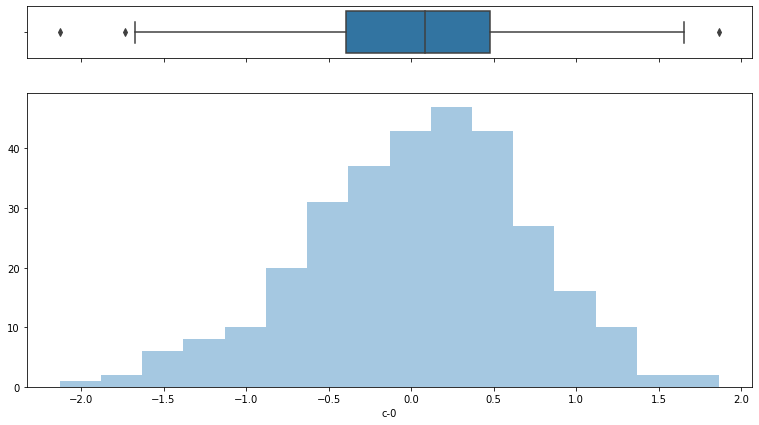

In [30]:
# Plot of the viability of c-0 in the controls treated with D2 for 24 hours

print(df_ctrl_d2_24['c-0'].agg(['mean', 'median']))

# Cut the window i 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(13,7),  
                                      gridspec_kw={"height_ratios": (0.15, 0.85)})

# Add a graph in each part
sns.boxplot(df_ctrl_d2_24['c-0'], ax=ax_box)
sns.distplot(df_ctrl_d2_24['c-0'], kde=False, ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## Are the viabilities in controlled cell lines treated with dose D2 sigfinicantly different over time?
### Take cell line #0 for example
### Under dose 2, doees the viability sigfinicantly change at 24 vs. 48 hours?
$H_0$: The average c-0 viablity data in controls with dose 2 are the same at 24 vs. 48 hours.<br>
$H_a$: The average c-0 viablity data in controls with dose 2 are significantly different at 24 vs. 48 hours.

In [6]:
# Check: the viability data of df_ctrl_d2 should have 305 rows. 

df_ctrl_d2_24['c-0'].size, df_ctrl_d2_48['c-0'].size

(305, 305)

In [32]:
25*23

575

Text(0.5, 1.0, 'Compare c-0 viability at 24 and 48 hrs')

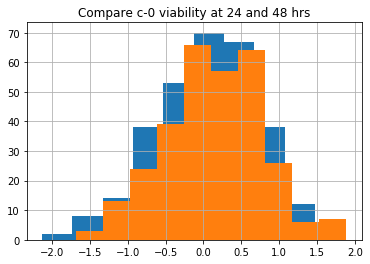

In [10]:
# Compare the distribution of the c-0 data at 24 vs. 48 hours. 

df_ctrl_d2_24['c-0'].hist()
df_ctrl_d2_48['c-0'].hist()
plt.title("Compare c-0 viability at 24 and 48 hrs")

In [11]:
# Test the assumption of equal variance by Levene's test

stats.levene(df_ctrl_d2_24['c-0'], df_ctrl_d2_48['c-0'])

# since p > 0.05, we can say that the variances are not significantly different
# set the argument in ttest_ind of equal_var to be true

LeveneResult(statistic=0.17198316441562886, pvalue=0.6785015699903569)

In [12]:
# variances are equal
# t-test

stats.ttest_ind(df_ctrl_d2_24['c-0'], df_ctrl_d2_48['c-0'], equal_var=True)

# Since p > 0.05, it is fail to reject the H0. Hence, no sigfinicant difference has been found in c-0

Ttest_indResult(statistic=-1.833376733131924, pvalue=0.06723527624790276)

### Expand to all cell viability data in controls with dose 2 different at 24 vs. 48 hours?
$H_0$: The average viability in all cell lines in control with dose 2 are the same at 24 vs. 48 hours.<br>
$H_a$: The average viability in all cell lines in control with dose 2 are significantly different at 24 vs. 48 hours.

In [26]:
# Iterate the rest of the gene expression data

output_s = {}
output_p = {}

for i in range(0, 100):
    cell = 'c-' + str(i)
    s, p = stats.levene(df_ctrl_d2_24[cell], df_ctrl_d2_48[cell])
    if p < 0.05:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[cell], df_ctrl_d2_48[cell], equal_var=False)
    else:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[cell], df_ctrl_d2_48[cell], equal_var=True)
    output_s[cell] = s1
    output_p[cell] = p1

ctrl_24_48_c = pd.Series(output_p)
ctrl_24_48_c.size

100

In [16]:
# Count how many genes are expressed differently for control group treated with does D2 
# at 24 hours vs. 48 hours
# set the alpha = 0.05

mask = (ctrl_24_48_c < 0.05)
diff_c_24_48 = ctrl_24_48_c[mask]
diff_c_24_48.size

36

<div class="alert alert-block alert-success">
<b>Takeways:<br> 
    1. 36 cell lines have significalty different viability in controls treated with dose 2 at 24 vs. 48 hours.<br>
    2. Waht does this indicate? Indicate those 36 cell lines have shorter doubling times.<br>
    3. Healthy vs. Cancer, for example (No, they shold all be cancer cell lines)</b></div>

In [37]:
# By observation, cell line 42 has the smalllest value of p-value

diff_c_24_48.loc['c-42']

4.3580138827153873e-07

Text(0.5, 1.0, 'Compare c-42 viability at 24 and 48 hrs')

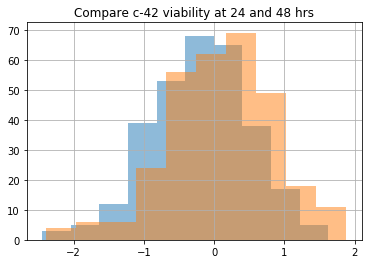

In [36]:
# Compare the distribution of the c-42 data at 24 vs. 48 hours. 

df_ctrl_d2_24['c-42'].hist(alpha=0.5)
df_ctrl_d2_48['c-42'].hist(alpha=0.5)
plt.title("Compare c-42 viability at 24 and 48 hrs")

## Are genes' expression in one observation normalized?
According to the literature, they are. 

mean      0.167008
median    0.227750
Name: id_90a774a1a, dtype: float64


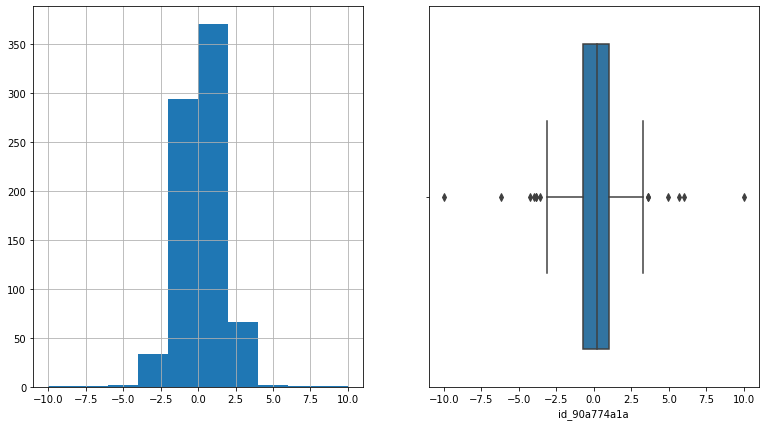

In [84]:
# Visualize gene expression data in one random sample

id_random = df_ctrl_d2_24.sample(1)

# subset the gene expression data only

mask_g = id_random.columns.str.contains('g-')
id_random_g = id_random.T[mask_g].iloc[:, 0]

# Print out mean, median and mode of the dataset

print(id_random_g.agg(['mean', 'median']))

# Visualize the distribution and boxplot of the gene expression

plt.figure(figsize=(13,7))

plt.subplot(121)
id_random_g.hist()

plt.subplot(122)
sns.boxplot(id_random_g)

## <div class="alert alert-block alert-info">Explore Target Varibles</div>

In [2]:
# Read file train_targets_socred

targets = pd.read_csv('train_targets_scored.csv', index_col=0)
targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23814 entries, id_000644bb2 to id_ffffdd77b
Columns: 206 entries, 5-alpha_reductase_inhibitor to wnt_inhibitor
dtypes: int64(206)
memory usage: 37.6+ MB


### How many types of drugs out there?

In [58]:
# Count the number of ids for the drug type and summarize them in dataframe
sum_drug = pd.DataFrame(targets.sum(axis=0).sort_values(ascending=False)).reset_index()

# Rename the column names
sum_drug.rename(columns={'index': 'drug_type', 0: 'total'}, inplace=True)

# Show top 5 rows of sum_tars
sum_drug.head()

,drug_type,total
0,nfkb_inhibitor,832
1,proteasome_inhibitor,726
2,cyclooxygenase_inhibitor,435
3,dopamine_receptor_antagonist,424
4,serotonin_receptor_antagonist,404


In [59]:
# Split the type into binding site and the type of action
sum_drug_break = sum_drug.drug_type.str.rsplit(pat='_', n=1, expand=True)

# Rename the columns in the sum_subtype
sum_drug_break.rename(columns={0: 'binding_site', 1: 'action'}, inplace=True)

# Print the first 5 rows in the sum_function
sum_drug_break.head()

,binding_site,action
0,nfkb,inhibitor
1,proteasome,inhibitor
2,cyclooxygenase,inhibitor
3,dopamine_receptor,antagonist
4,serotonin_receptor,antagonist


In [60]:
# Concat sum_function with sum_drug
sum_drug = pd.concat([sum_drug_break, sum_drug], axis=1)

# Print the first 5 rows of the new sum_drug
sum_drug.head()

,binding_site,action,drug_type,total
0,nfkb,inhibitor,nfkb_inhibitor,832
1,proteasome,inhibitor,proteasome_inhibitor,726
2,cyclooxygenase,inhibitor,cyclooxygenase_inhibitor,435
3,dopamine_receptor,antagonist,dopamine_receptor_antagonist,424
4,serotonin_receptor,antagonist,serotonin_receptor_antagonist,404


In [61]:
sum_drug.sample(10)

,binding_site,action,drug_type,total
205,atp-sensitive_potassium_channel,antagonist,atp-sensitive_potassium_channel_antagonist,1
4,serotonin_receptor,antagonist,serotonin_receptor_antagonist,404
85,insulin,sensitizer,insulin_sensitizer,51
149,beta_amyloid,inhibitor,beta_amyloid_inhibitor,24
66,retinoid_receptor,agonist,retinoid_receptor_agonist,67
163,farnesyltransferase,inhibitor,farnesyltransferase_inhibitor,18
185,aldehyde_dehydrogenase,inhibitor,aldehyde_dehydrogenase_inhibitor,7
195,lxr,agonist,lxr_agonist,6
83,chelating,agent,chelating_agent,54
89,dna_alkylating,agent,dna_alkylating_agent,48


In [96]:
# Count the ids by drug action

sum_action = sum_drug.groupby(by='action').total.sum()
sum_action.sort_values(ascending=False)

action
inhibitor       9693
antagonist      3449
agonist         2330
blocker          323
agent            150
activator        115
local             80
medium            56
sensitizer        51
stimulant         49
antifolate        36
secretagogue      30
donor             26
b                 26
scavenger         18
Name: total, dtype: int64

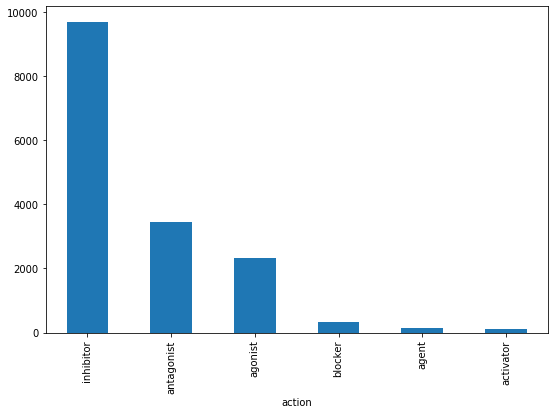

In [116]:
# Visualize the top 6 with most counts

plt.figure(figsize=(9,6))
sum_action.sort_values(ascending=False).head(6).plot.bar()

**Takeaways**: the top 6 drug types are:
- inhibitor
- antagonist
- agonist
- blocker
- agent
- activator

### What are the targets that the drugs act on one at a time? 

In [70]:
# Sum how many targets one id has

targets.sum(axis=1)

# Create a mask for id binding one target only

mask = (targets.sum(axis=1) == 1)
mask.size # 23814

# Select all the ids with two targets

one_tar = targets.loc[mask, :]
one_tar.shape # 12532 drugs only act on one target only

(12532, 206)

In [93]:
# Compute the counts of each target
count_one_tar = one_tar.sum(axis=0)

# Put the targets in dscending order by count and show top 10
count_one_tar.sort_values(ascending=False).head(10)

cyclooxygenase_inhibitor             374
glutamate_receptor_antagonist        337
adrenergic_receptor_antagonist       335
dna_inhibitor                        330
cdk_inhibitor                        316
dopamine_receptor_antagonist         310
egfr_inhibitor                       299
tubulin_inhibitor                    298
acetylcholine_receptor_antagonist    295
serotonin_receptor_antagonist        294
dtype: int64

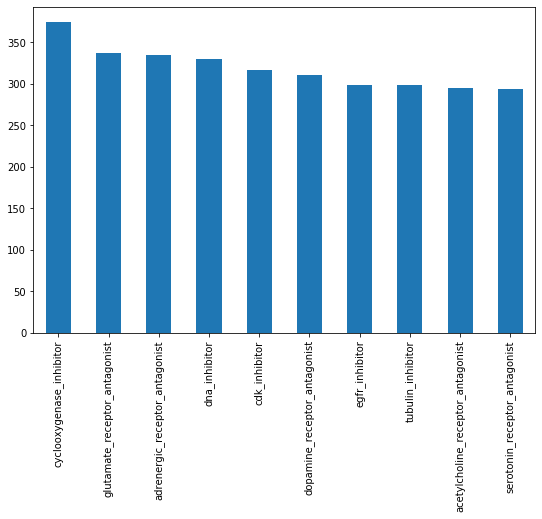

In [115]:
# Plot the distriubtion the top 10 targets with highest counts

plt.figure(figsize=(9,6))
count_one_tar.sort_values(ascending=False).head(10).plot.bar()

### What are the targets that the drugs act on two at a time?

In [33]:
# Sum how many targets one id has

targets.sum(axis=1)

# Create a mask for id with two targets only

mask = (targets.sum(axis=1) == 2)
mask.size # 23814

# Select all the ids with two targets

two_tars = targets.loc[mask, :]
two_tars.shape #(1538, 206)

(1538, 206)

In [34]:
# Count the number of each target
count_two_tars = two_tars.sum(axis=0)

# Put the targets in desceding order by counts
count_two_tars.sort_values(ascending=False).head()

nfkb_inhibitor                   736
proteasome_inhibitor             718
dopamine_receptor_antagonist     114
serotonin_receptor_antagonist    103
dna_inhibitor                     60
dtype: int64

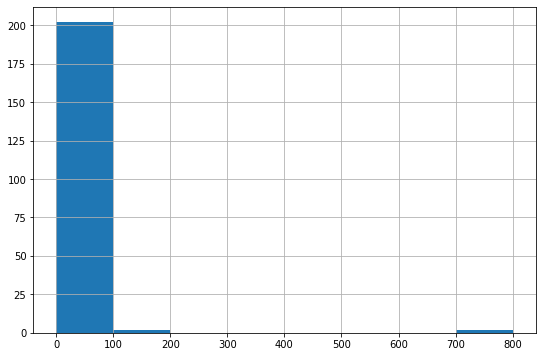

In [35]:
# Visualize the coutnt of each targets

plt.figure(figsize=(9, 6))
count_two_tars.hist(bins=[0, 100, 200, 300, 400, 500, 600, 700, 800])

In [43]:
# Displays frequency distribution of the top 2 targets: nfkb_inhibitor and proteasome inhibitor. 
contingency_table = pd.crosstab(two_tars.nfkb_inhibitor, two_tars.proteasome_inhibitor)
contingency_table

proteasome_inhibitor,0,1
nfkb_inhibitor,,
0,802,0
1,18,718


In [44]:
# Conduct chi2 test
test_results = stats.chi2_contingency(contingency_table)
test_results # Since p < 0.05, nfkb_inhibitor and proteasome_inhibitor are dependent. 

(1463.5337743002926,
 0.0,
 1,
 array([[427.59427828, 374.40572172],
        [392.40572172, 343.59427828]]))

**Takeaways**
1. 802 ids target neigher proteasome inhibitor nor nfkb inhibitor.
2. 718 ids target both proteasome inhibitor and nfkb inhibor.
3. 18 ids target nfkb inhibitor but not proteasome inhbitor.
4. 0 ids target proteasome inhibitor but not nfkb inhibitor. 

Reference: Proteasome inhibitors are currently used as chemotherapeutic drugs because of their ability to block NF-kB, a transcription factor constitutively activated in many different types of human cancer.

In [69]:
# Display frequency distribution of the next 2 targets: 
# dopamine_receptor_antagonist and serotonin_receptor_antagonist

contingency_table  = pd.crosstab(two_tars.dopamine_receptor_antagonist, two_tars.serotonin_receptor_antagonist)
contingency_table 

serotonin_receptor_antagonist,0,1
dopamine_receptor_antagonist,,
0,1392,32
1,43,71


In [46]:
# Conduct Chi2 test

test_results = stats.chi2_contingency(contingency_table)
test_results # Since p < 0.05, the pair are dependent. 

(599.2230894653862,
 2.470491912087283e-132,
 1,
 array([[1328.63459038,   95.36540962],
        [ 106.36540962,    7.63459038]]))

**Takeaways**
1. 1392 ids target neigher dopamine_receptor_antagonist nor serotonin_receptor_antagonist.
2. 71 ids target both dopamine_receptor_antagonist and serotonin_receptor_antagonist.
3. 43 ids target dopamine_receptor_antagonist only. 
4. 32 ids target serotonin_receptor_antagonist only. 

In [79]:
# Sort the index of count_one_tar
count_one_tar.sort_index()

11-beta-hsd1_inhibitor                    12
5-alpha_reductase_inhibitor               17
acat_inhibitor                            24
acetylcholine_receptor_agonist           184
acetylcholine_receptor_antagonist        295
                                        ... 
ubiquitin_specific_protease_inhibitor      6
vegfr_inhibitor                           60
vitamin_b                                 26
vitamin_d_receptor_agonist                39
wnt_inhibitor                             30
Length: 206, dtype: int64

In [80]:
# Sort the index of count_two_tars
count_two_tars.sort_index()

11-beta-hsd1_inhibitor                    0
5-alpha_reductase_inhibitor               0
acat_inhibitor                            0
acetylcholine_receptor_agonist            6
acetylcholine_receptor_antagonist         6
                                         ..
ubiquitin_specific_protease_inhibitor     0
vegfr_inhibitor                          54
vitamin_b                                 0
vitamin_d_receptor_agonist                0
wnt_inhibitor                             0
Length: 206, dtype: int64

In [101]:
# Concat the Series count_one_tar and count_two_tars

join_one_two = pd.concat([count_one_tar, count_two_tars], axis=1)
join_one_two.head(5)

,0,1
5-alpha_reductase_inhibitor,17,0
11-beta-hsd1_inhibitor,12,0
acat_inhibitor,24,0
acetylcholine_receptor_agonist,184,6
acetylcholine_receptor_antagonist,295,6


### What are the targets that the drugs act on three at a time?

In [105]:
# Sum how many targets one id has
targets.sum(axis=1)

# Create a mask for id with three targets only
mask = (targets.sum(axis=1) == 3)
mask.size # 23814

# Select all the ids with two targets
three_tars = targets.loc[mask, :]
three_tars.shape #(303, 206)

(303, 206)

In [106]:
# Count the number of each target
count_three_tars = three_tars.sum(axis=0)

# Put the targets in desceding order by counts
count_three_tars.sort_values(ascending=False)

kit_inhibitor                   236
pdgfr_inhibitor                 230
flt3_inhibitor                  210
vegfr_inhibitor                  31
corticosteroid_agonist           18
                               ... 
membrane_integrity_inhibitor      0
mek_inhibitor                     0
mdm_inhibitor                     0
lxr_agonist                       0
5-alpha_reductase_inhibitor       0
Length: 206, dtype: int64

In [107]:
# Sort the index of the count_three_tars
count_three_tars.sort_index()

11-beta-hsd1_inhibitor                    0
5-alpha_reductase_inhibitor               0
acat_inhibitor                            0
acetylcholine_receptor_agonist            0
acetylcholine_receptor_antagonist         0
                                         ..
ubiquitin_specific_protease_inhibitor     0
vegfr_inhibitor                          31
vitamin_b                                 0
vitamin_d_receptor_agonist                0
wnt_inhibitor                             0
Length: 206, dtype: int64

In [110]:
# Concat join_one_two and count_three_tars

join_one_two_three = pd.concat([join_one_two, count_three_tars], axis=1)
join_one_two_three.head()

,0,1,0
5-alpha_reductase_inhibitor,17,0,0
11-beta-hsd1_inhibitor,12,0,0
acat_inhibitor,24,0,0
acetylcholine_receptor_agonist,184,6,0
acetylcholine_receptor_antagonist,295,6,0


### How many paired targets are related? 
- Targets matrix
- two_tars matrix

In [101]:
# Import library
from itertools import combinations

#### targets matrix

In [103]:
# Put all MoA annotations into a list
annotation_list = targets.columns.to_list()

# Create a list of the combination of two annotations out of all
two_annotations = list(combinations(annotation_list, 2))

# Print their length
len(annotation_list), len(two_annotations) # 206 annotations and 21115 groups of two

(206, 21115)

In [105]:
# Take a quick look at the combinations
two_annotations[:5]

[('5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor'),
 ('5-alpha_reductase_inhibitor', 'acat_inhibitor'),
 ('5-alpha_reductase_inhibitor', 'acetylcholine_receptor_agonist'),
 ('5-alpha_reductase_inhibitor', 'acetylcholine_receptor_antagonist'),
 ('5-alpha_reductase_inhibitor', 'acetylcholinesterase_inhibitor')]

In [113]:
# For Loop to compute the conduct the Chi2 Test for each pair

# Empty list to hold the p-value
p = []

for pair in two_annotations:
    contingency_table = pd.crosstab(targets[pair[0]], targets[pair[1]]) # Create the contingency table
    test_results = stats.chi2_contingency(contingency_table) # conduct chi2 test
    p.append(test_results[1]) # collec the p-values

In [114]:
# Check the lenth p
len(p) # match 21115

21115

In [115]:
# Turn the resutls into a dataframe

targets_chi2 = pd.DataFrame(two_annotations, columns=['target1', 'target2']).assign(p_chi2 = p)
targets_chi2.shape

(21115, 3)

In [142]:
# Take a look at targets_chi2
targets_chi2.head()

,target1,target2,p_chi2
0,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,0.000017
1,5-alpha_reductase_inhibitor,acat_inhibitor,0.000222
2,5-alpha_reductase_inhibitor,acetylcholine_receptor_agonist,0.320379
3,5-alpha_reductase_inhibitor,acetylcholine_receptor_antagonist,0.535754
4,5-alpha_reductase_inhibitor,acetylcholinesterase_inhibitor,0.049331


In [124]:
# Compute how many pairs are related
# Set alpha = 0.05

mask = targets_chi2.p_chi2 < 0.05  
mask.sum() # 8906 pairs are dependent

8906

In [126]:
# # Convert the dependent pairs to .csv
# targets_chi2.to_csv('targets_chi2.csv')
# targets_chi2[mask].to_csv('targets_chi2_dependent.csv')

#### two_tars matrix

In [159]:
# List all the MoA annotations from dataframe two_tars
annotations = two_tars.columns.to_list()

# Pick 2 annotations of all despite of order
two_annotatioins  = list(combinations(annotations, 2))

In [160]:
# Take a quick look at the paired annotations
two_annotatioins[:5]

[('5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor'),
 ('5-alpha_reductase_inhibitor', 'acat_inhibitor'),
 ('5-alpha_reductase_inhibitor', 'acetylcholine_receptor_agonist'),
 ('5-alpha_reductase_inhibitor', 'acetylcholine_receptor_antagonist'),
 ('5-alpha_reductase_inhibitor', 'acetylcholinesterase_inhibitor')]

In [161]:
# For Loop to compute the p-values of Chi2 test

# Empty list to hold the p-value
p = []

for pair in two_annotations:
    contingency_table = pd.crosstab(two_tars[pair[0]], two_tars[pair[1]]) # Create the contingency table
    test_results = stats.chi2_contingency(contingency_table) # conduct chi2 test
    p.append(test_results[1]) # collec the p-values

In [163]:
# Turn the resutls into a dataframe

two_tars_chi2 = pd.DataFrame(two_annotatioins, columns=['target1', 'target2']).assign(p_chi2 = p)
two_tars_chi2.shape

(21115, 3)

In [166]:
mask = two_tars_chi2.p_chi2 < 0.05
mask.sum() # 1883 dependent pairs

1883

In [153]:
# # Convert the dependent pairs to .csv
# df_two_chi2.to_csv('two_tars_chi2.csv')
# two_tars_chi2[(two_tars_chi2.p_chi2 < 0.05)].to_csv('two_tars_chi2_dependent.csv')

In [172]:
# Take a dependent pair for example
pd.crosstab(targets['mtor_inhibitor'], targets['pi3k_inhibitor'])

# The takeaway is that most of the drugs don't affect both at the same time. 

pi3k_inhibitor,0,1
mtor_inhibitor,,
0,23575,109
1,88,42


In [173]:
# Take an independent pair for example

pd.crosstab(two_tars['dna_inhibitor'], two_tars['ikk_inhibitor'])

ikk_inhibitor,0
dna_inhibitor,
0,1478
1,60
